<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.4 Principal Component Analysis**
Principal compnent analysis is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. Its underlying mathematics can be explained with singular value decomposition.

##**1.4.1 Singular Value Decomposition**
Let *A* be an *m x n* matrix. Then *A$^{T}$A* is symmetric and can be orthogonally diagonalized. Let **v$_{1}$,...,v$_{n}$** be an orthonormal basis for ℝ$^{n}$ consisting of eigenvectors of *A$^{T}$A*, and let λ$_{1}$,...,λ$_{n}$ be the associated eigenvalues of *A$^{T}$A*. Then for 1 ≤ *i* ≤ n,
\begin{align}
||A\mathbf{v_i}||^2 = (A\mathbf{v_i})^{T}A\mathbf{v_{i}} = \mathbf{v_i}^{T}A^{T}A\mathbf{v_i}
\end{align}
\begin{align}
= \mathbf{v_i}^{T}(λ_{i}\mathbf{v_i})
 \text{ since } \mathbf{v_i} \text{ is an eigenvectors of } A^{T}A
 \end{align}
  \begin{align}
  = λ_{i}
  \text{ since  } \mathbf{v_i} \text{ is a unit vector}
  \end{align}

  So the eigenvalues of *A* are all nonnegative. By renumbering, if neccesary, we may assume that the eigenvalues are arranged so that
  \begin{align}
  λ_1 ≥ λ_2 ≥ ...λ_n ≥0.
  \end{align}
  The singular values of *A* are the square roots of the eigenvalues of *A$^{T}$A*, denoted by σ$_{1}$,...,σ$_{n}$ and they are arranged in decreasing order. That is, σ$_{i}$ = λ$_{i}^{1/2}$ for 1 ≤ i ≤ n. The singular values of *A* are lengths of the vectors *A*𝐯$_{1}$,..., *A*𝐯$_{n}$.

  **Theorem 1.4.1** If an *m x n* matrix *A* has *r* nonzero singular values σ$_{1}$,...,σ$_{r}$ ≥ 0 with σ$_{r+1}$ = ... = σ$_{n}$ = 0, then the dimension of col(A) = *r*

  **Theorem 1.4.2 (The singular Value Decomposition)**: Let *A* be an *m x n* matrix with the dimension of col(A) = *r*. Then there exists an *m x n* matrix Σ, where the diagonal entries in *D* are the first *r* singular values of *A* σ$_{1}$ ≥ σ$_{2}$ ≥ ... ≥ σ$_{r}$ ≥ 0, and there exist an *m x m* orthogonal matrix *U* and an *n* x *n* orthogonal matrix *V* such that
  \begin{align}
  A = UΣV^T
  \end{align}

In [ ]:
# Example of Singular Value Decomposition to see whether
# we are able to reconstruct the image using only 2 features for each row.
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X, y = load_digits(return_X_y=True) #will return the pixles as a one dimensional array
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


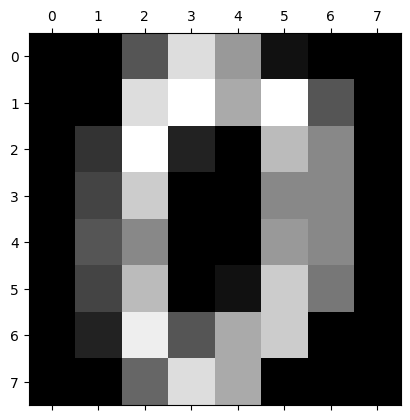

In [ ]:
image = X[0]
image = image.reshape((8,8))
plt.matshow(image, cmap = 'gray')


In [ ]:
# Using Singular Value Decomposition
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)


[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


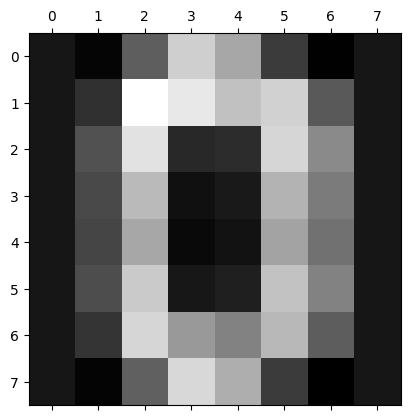

In [ ]:
plt.matshow(A, cmap = 'gray')

In [ ]:
# How to get the reduced feature space
U.dot(S) # Taking the dot produc of the U and S matrices

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

##**Low-Rank Matrix Approximations**
In this section, we discuss low-rank approximations of matrices. We first introduce matrix norms which allow us in particular to talk about the distance between two matrices.

**Definition 1.4.3 (Induced Norm):** The 2-norm of a matrix *A* ∈ ℝ$^{n x m}$ is
\begin{align}
||A||^2 = \max_{0 \neq \mathbf{x}∈ℝ^m} \frac{||A\mathbf{x}||}{||\mathbf{x}||} = \max_{\mathbf{x} \neq 0, ||\mathbf{x}|| = 1} ||A\mathbf{x}|| = \max_{\mathbf{x} \neq 0, ||\mathbf{x}|| = 1} || \mathbf{x}^TA^{T}A\mathbf{x}
\end{align}
Let *A* ∈ ℝ$^{nxm}$ be a matrix with SVD
\begin{align}
A = \sum^r_{j=1} σ_{j}\mathbf{u}_j\mathbf{v}_j^T
\end{align}
For *k < r*, truncate the sum at the *k*-th term
\begin{align}
A = \sum^k_{j=1} σ_{j}\mathbf{u}_j\mathbf{v}_j^T
\end{align}
The rank of *A$_{k}$* is exactly *k*. Indeed, by construction,
1. the vectors {**u$_{j}$** : *j* = 1,...,*k*} are orthonormal, and
2. since σ$_{j}$ > 0 for *j* = 1,...,k and the vectors {**v$_{j}$** : *j* = 1,...,*k*} are orthonormal, {**u$_{j}$** : *j* = 1,...,*k*} spans the column space *A*$_{k}$.

**Lemma 1.4.4 (Matrix Norms and Singular Values):** Let *A* ∈ℝ$^{nxm}$ be a matrix with SVD
\begin{align}
A = \sum^r_{j=1} σ_{j}\mathbf{u}_j\mathbf{v}_j^T
\end{align}
where recall that σ$_{1}$ ≥ σ$_{2}$ ≥ ... σ$_{r}$ > 0 and let *A*$_{K}$ be the truncation defined above. Then
\begin{align}
||A-A_k||^2_2 = σ_{k+1}^2
\end{align}

**Theorem 1.4.5 (Eckart-Young-Mirsky theorem) (Low-Rank Approximation in the Induceed Norm):** Let *A* ∈ℝ$^{n x m}$ be a matrix with SVD
\begin{align}
A = \sum^r_{j=1} σ_{j}\mathbf{u}_j\mathbf{v}_j^T
\end{align}
and let *A*$_{k}$ be the truncation defined above with *k < r*. For any matrix *B* ∈ ℝ$^{n x m}$ of rank at most *k*,
\begin{align}
||A-A_{k}||_2 ≤ ||A-B||_2.
\end{align}

##**1.4.3 Principal Component Analysis**
**1.4.3.1 Covariance Matrix**

To prepare for principal component analysis, let [**X**$_{1}$...**X**$_{1}$] be a *p* x *N* matrix of observation, auch as described above. The sample mean *M* of the observation vectors **X**$_{1}$,...,**X**$_{n}$ is given by
\begin{align}
\mathbf{M} = \frac{1}{N}(\mathbf{X}_1+...+\mathbf{X}_{n})
\end{align}
For *k* = 1,...,*N*, let
\begin{align}
\hat{\mathbf{X}}_{k} = \mathbf{X}_k - \mathbf{M}
\end{align}
The columns of the *p* x *N* matrix
\begin{align}
B = [\hat{\mathbf{X}}_1,\hat{\mathbf{X}}_2,...\hat{\mathbf{X}}_N]
\end{align}
have a zero sample mean, and B is said to be in mean-deviation form. The (sample) covariance matrix is the *p* x *p* matrix *S* defined by
\begin{align}
S = \frac{1}{N-1}BB^T
\end{align}
Since any matrix of the form *BB$^{T}$* is positive semidefinite, so is S.

**1.4.3.2 Principal Component Analysis**
Now assume that the columns of the *p* x *N* data matrix
\begin{align}
X = [\mathbf{X}_1,\mathbf{X}_2,...,\mathbf{X}_N]
\end{align}
is already in mean-deviation from. The goal of principal component analysis (PCA) is to find k,(*k* ≤ *p*) orthonormal vectors **v$_{1}$**,...,**v$_{k}$**, (top *k* principal components) that maximize the objective function
\begin{align}
\frac{1}{N}\sum_{i=1}^N\sum{j=1}^{k}⟨\mathbf{X_{i}}·\mathbf{v_{j}}⟩^2
\end{align}
⟨**X$_{i}$·v$_{j}$**⟩ is the length of projection of **X$_{i}$** on **v$_{i}$**.

On the other hanf, for each *j*, it is easy to see that
\begin{align}
\mathbf{v_j}^{T}XX^{T}\mathbf{v_{j}} = (X^{T}\mathbf{v_j})^{T}(X^{T}\mathbf{v_{j}})\sum_{i=1}^N⟨\mathbf{X_i}·\mathbf{v_j}⟩^2
\end{align}
where XX$^{T}$ IS A *p* X *p* matrix. As a result, for each *j* ≤ *k*, the variance-maximization problem can be rephrased as
\begin{align}
\text{argmax}_{\mathbf{v:||v||=1}}\mathbf{v_j}^{T}XX^{T}\mathbf{v_j}
\end{align}
Assume that
\begin{align}
XX^{T} = Vdiag(λ_1,...,λ_p)V^{T}
\end{align}
\begin{align}
\text{or}
\end{align}
\begin{align}
V^{T}XX^{T}V = (λ_1,...λ_p).
\end{align}
In view of Theorem 1.4.5, we conclude that the optimal choice of the first *k* eigenvectors of *XX$^{T}$ corresponding to the first *k* largest eigenvalues, which are also the first *k* columns of *v* = [**v$_{1}$**,...,**v$_{p}$**] of the covariance matrix XX$^{T}$, which are called the principal components of the data (in the matrix' of observations). The first principal components of the data (in the matrix' of observations). The first principal component is the eigenvector corresponding to the largest eigenvalue of *XX$^{T}$*, the second principal component is the eigenvector corresponding to the second largest eigenvalue, and so on.
  The orthogonal *p* x *p* matrix *V* = [**v$_{1}$,...,**v$_{p}$**] that determines a change of variable, **x** = *V*𝐲, or
\begin{align}
\begin{pmatrix}
x_1 \\
x_2 \\
: \\
x_p
\end{pmatrix}
=
\begin{pmatrix}
\mathbf{v_1} & \mathbf{v_2} & ... & \mathbf{v_p}
\end{pmatrix}
\begin{pmatrix}
y_1 \\
y_2 \\
: \\
y_p
\end{pmatrix}
\end{align}
with the property that the new variables *y$_{1}$*,..., *y$_{p}$* are uuncorrelated and are arranged in order of decreasing variance. Indeed, we have
\begin{align}
\mathbf{x}^{T}XX^{T}\mathbf{x} = \mathbf{y}^{T}V^{T}XX^{T}V\mathbf{y} = \mathbf{y}^{T}\text{diag}(λ_1,...,λ_p)\mathbf{y} = \sum_1^pλ_{i}y_{i}^2
\end{align}
The orthogonal change of variable **x** = *V*𝐲 that each observation vector **x** recieves a "new name" **y**, such that **x** = *V*𝐲. Notice that **y** = *V*$^{ -1}$𝐱 = *V*$^{T}$**x**. Let *v*$_{1i}$,...,*v*$_{pi}$ be the entries in **v**$_{i}$. Since **v$_{i}$**^{T} the *i*th row of *V*$^{T}$, the equation **y** = *V*$^{T}$**x** shows that
\begin{align}
y_{i} = \mathbf{v_i}^{T}\mathbf{x} = v_{1i}x_{1} + v_{2i}x_{2} +...+ v_{pi}x_{p}
\end{align}
Thus *y$_{i}$* is a linear combination of the original variables *x*$_{1}$,...,*x*$_{p}$, using the entries the eigenvector **v**$_{i}$ as weights, which are called loadings.

In [ ]:
## Principal Component analysis from Scratch in Python

## Importing required libraries
import numpy as np

def PCA(X, num_components):
## 1. Subtract the mean of each variable
  X_meaned = X - np.mean(X, axis = 0)

## 2. Calculate the Covariance Matrix
  cov_mat = np.cov(X_meaned, rowvar = False)

## 3. Compute the Eigenvalues and Eigenvectors
  eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

## 4. Sort Eigenvalues in descending order
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

## 5. Select a subset from the rearranged Eigenvalue matrix
  n_components = 2
  eigenvector_subset = sorted_eigenvectors[:,0:n_components]

## 6. Transform the data
  X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

  return X_reduced

In [ ]:
## We will use IRIS dataset and apply our PCA function to it
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


<Axes: xlabel='PC1', ylabel='PC2'>

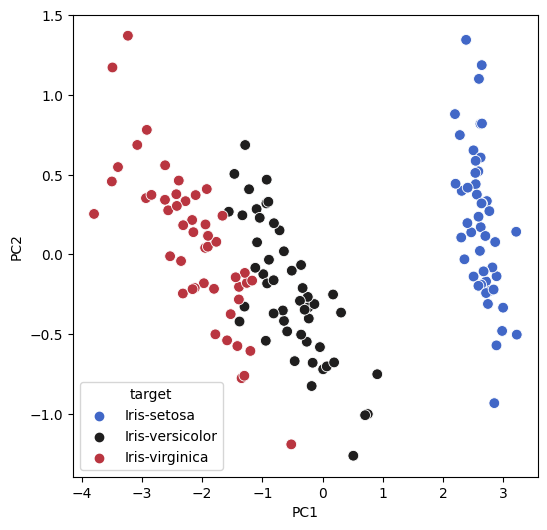

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df, x = 'PC1', y = 'PC2', hue = 'target', s = 60, palette = 'icefire')

**1.4.3.3 Total Variance**
Given the columns of the *p* x *N* data matrix and assume it is already in mean-deviation from
\begin{align}
X = [\mathbf{X_1}, \mathbf{X_2},...\mathbf{X_N}]
\end{align}
and let covariance matrix *S*
\begin{align}
S = \frac{1}{N-1}XX^T
\end{align}
The entries in *S* = [*S*$_{ij}$], for *j* = 1,...,*p*, the diagonal entry *s*$_{jj}$ in S is called the variance of *x*$_{j}$, which is the first *j*-th row of X. The variance of *x*$_{j}$ measures the spread of the values of *x*$_{j}$. The total variance of the data is the sum of the variances on the diagonal of S. In general, the sum of the diagonal entries of aaquare matrix S is called the trace of the matrix, written *tr*(S). Thus
\begin{align}
\text{Total Variance} = tr(S)
\end{align}

Note that if
\begin{align}
XX^{T} = Vdiag(λ_1,...,λ_p)V^{T}
\end{align}
\begin{align}
\text{or}
\end{align}
\begin{align}
V^{T}XX^{T}V = (λ_1,...λ_p).
\end{align}

then
\begin{align}
\text{tr(S)} = \frac{1}/{N-1} \sum_1^{p}λ_j.
\end{align}
because tr(*VSV$^{T}$*) = tr(S). Thus the fraction of the variances of the first *k* term truncation is
\begin{align}
\frac{∑_1^{k}λ_{j}}{∑_1^{p}λ_j}.
\end{align}